# K Nearest Neighboring Classifier (KNN)

1. Find the most nearest and similar data point and label them accordingly to perform segmentation
2. Predict test based on training dataset and label them by majjority voting

# Import Libaries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# Create Data for Features and Targets (Binary)

In [3]:
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, 
                                 n_features=2,
                                 n_redundant=0, 
                                 n_informative=2,
                                 n_clusters_per_class=1, 
                                 flip_y = 0.20,
                                 class_sep = 0.5, 
                                 random_state=0)

In [4]:
print("Shape of X:", X_C2.shape)
print("Shape of y:", y_C2.shape)

Shape of X: (100, 2)
Shape of y: (100,)


In [5]:
print('1st 10 Values of X_C2', '\n', X_C2[0:10])
print('1st 10 Values of y_C2', '\n', y_C2[0:10])

1st 10 Values of X_C2 
 [[ 0.45268095  2.71997151]
 [ 0.45000368  1.33240861]
 [ 0.57961675 -0.5723168 ]
 [ 0.39504704  1.54584346]
 [ 0.22986176 -0.4703054 ]
 [-0.14918509  1.30535614]
 [-0.54491612 -0.12184212]
 [ 1.65473108 -0.48307649]
 [-2.32040545  3.19122169]
 [-2.39231977  0.68547357]]
1st 10 Values of y_C2 
 [1 1 1 1 0 0 0 0 0 1]


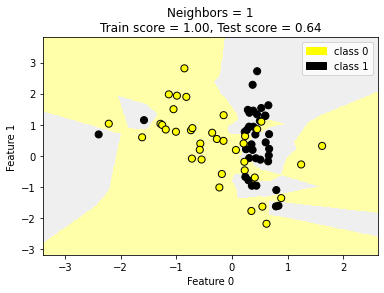

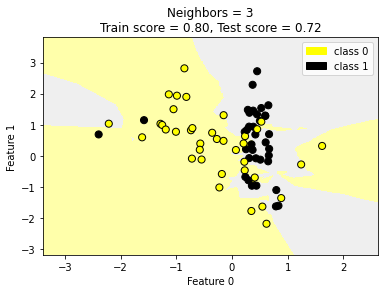

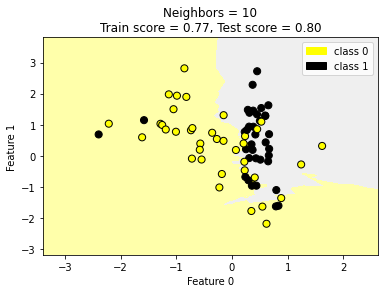

In [6]:
from adspy_shared_utilities import plot_two_class_knn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

#for K=1
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)

#for K=3
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)

#for K=10
plot_two_class_knn(X_train, y_train, 10, 'uniform', X_test, y_test)

# K Nearest Neighboring Regressor(KNN)

In [8]:
from sklearn.datasets import make_regression

#plt.figure()
#plt.title("Sample Regression Problem with One Input Variable")
X_R1, y_R1 = make_regression(n_samples = 100, n_features=2,
                            n_informative=2, bias = 150.0,
                            noise = 30, random_state=0)




#plt.scatter(X_R1, y_R1)
#plt.show()

In [9]:
X_R1[0:10]

array([[ 1.05445173, -1.07075262],
       [-0.36274117, -0.63432209],
       [-0.85409574,  0.3130677 ],
       [ 1.3263859 ,  0.29823817],
       [-0.4615846 , -1.31590741],
       [ 1.94362119, -1.17312341],
       [-1.60205766,  0.62523145],
       [-0.40178094,  0.17742614],
       [-0.97727788,  1.86755799],
       [ 0.37816252,  0.15494743]])

In [10]:
y_R1[0:10]

array([ 68.53556744,  71.24720489, 152.21841364, 202.23416022,
        -9.63925844,  98.19399915, 232.45707052, 139.04349111,
       334.08605329, 163.65139024])

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
y_output_predict = knnreg.predict(X_test)
print(y_output_predict)

print("R-Square Test Score: {:.3f}"
      .format(knnreg.score(X_test, y_test)))

      


[ 48.25165818  72.95266021 144.02374394 321.12168288 214.87364054
 234.49329812  71.90198359 157.8037756  184.69675681 214.71241529
  88.28186544 131.72307954 234.24778032 208.37189902 149.40891638
 130.78297079  73.90138312  46.3478626  187.87771705 234.49329812
 210.32155535  48.25165818 200.99245929 236.37220832  99.44877994]
R-Square Test Score: 0.778


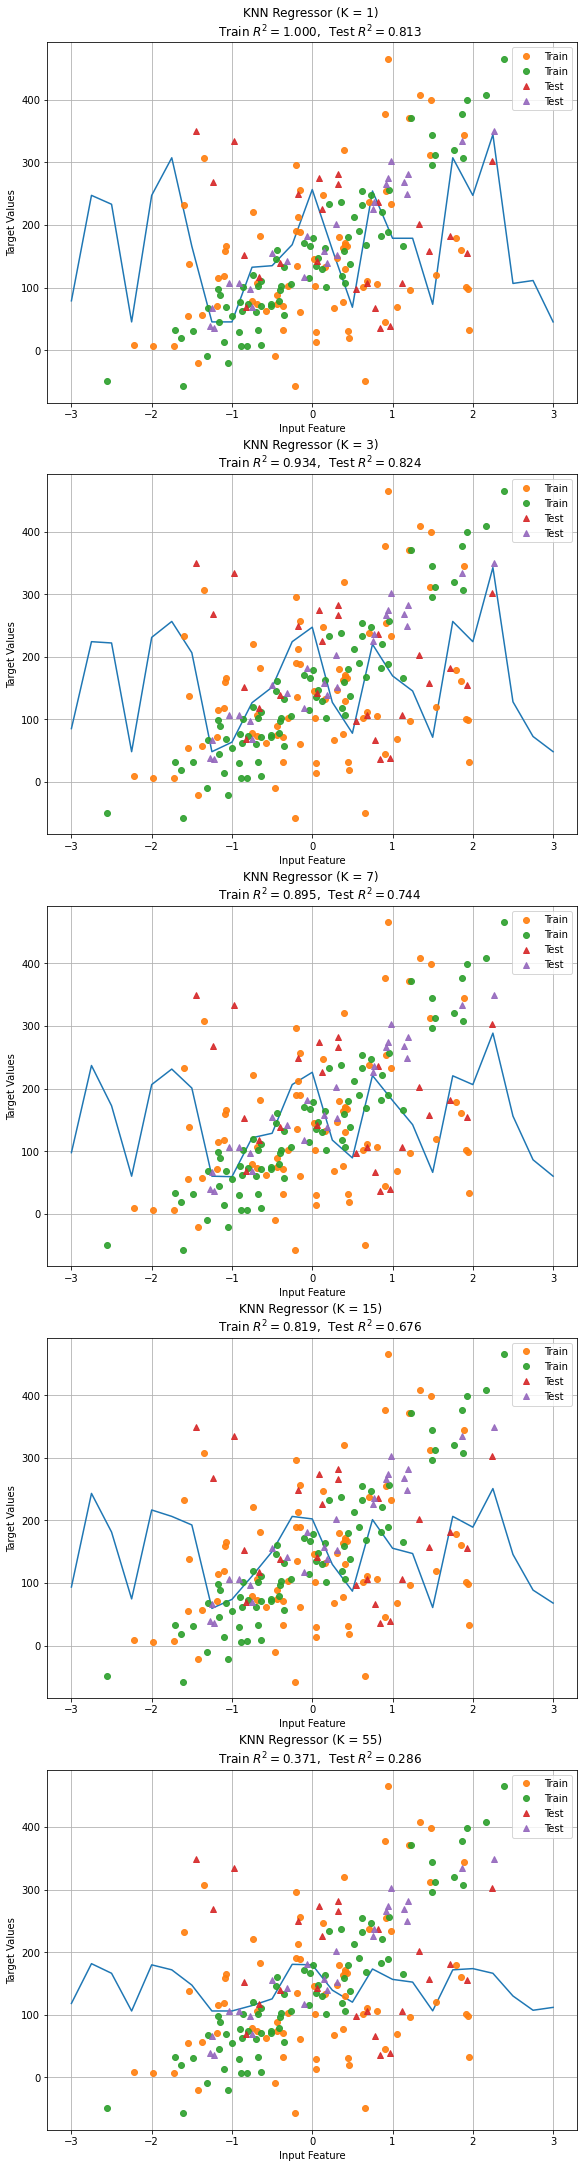

In [12]:
fig, subaxes = plt.subplots(5, 1, figsize = (8,30))

X_predict_input = np.linspace(3, -3, 25).reshape(-1, 1)

for thisaxis , K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_output_predict = knnreg.predict(X_test)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_output_predict) 
    thisaxis.plot(X_train, y_train,'o', alpha = 0.9, label = 'Train')
    thisaxis.plot(X_test, y_test, '^', alpha = 0.9, label = 'Test')
    thisaxis.set_xlabel("Input Feature")
    thisaxis.set_ylabel("Target Values")
    thisaxis.set_title("KNN Regressor (K = {}) \n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$"
                      .format(K, train_score, test_score))
    thisaxis.legend()
    thisaxis.grid(True)
    plt.tight_layout(pad = 0.3, w_pad = 0.5, h_pad = 0.5)
    

